# Plot spatial data for 20CR


In [5]:
import xarray as xr, matplotlib.pyplot as plt
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import dask.diagnostics # dask allows you to check how long something is taking to load
import climtas # needed to count event statistics with a specified duration

In [19]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

# 20CR data

In [7]:
# define path where netcdsf of temperature are stored
path = '/g/data/w48/kb6999/20CR_PRATE_seasonal_data_for_plots/'

In [8]:
# open mmm of rainfall 
mmm_mon_Glob = xr.open_dataset(f'{path}mmm_anom_glob.nc')
mmm_mon_Glob

<xarray.Dataset>
Dimensions:     (lat: 256, lon: 512, season: 4, seasonyear: 167)
Coordinates:
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * lon         (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat         (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * seasonyear  (seasonyear) int64 1850 1851 1852 1853 ... 2013 2014 2015 2016
Data variables:
    pr          (seasonyear, season, lat, lon) float64 ...

In [9]:
# select out dates around kraktoa eruption 
K_mmm_mon_Glob_r = mmm_mon_Glob.sel(seasonyear = slice('1880','1990'))

In [10]:
# reverse the latitude axis so it goes from -90 to 90
K_mmm_mon_Glob = K_mmm_mon_Glob_r.reindex(lat=list(reversed(K_mmm_mon_Glob_r.lat)))

In [13]:
# import landmask dataset 
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/20CR_data_netcdfs/land_pr_20CR.nc')
landmask = landfrac_ds

In [14]:
# Select out SH and NH anomalies 
K_mmm_mon_SH = K_mmm_mon_Glob.sel(lat=slice(0,-90)) 
K_mmm_mon_NH = K_mmm_mon_Glob.sel(lat=slice(90,0)) 
# select out the Australian and E Australian anomalies 
K_mmm_mon_Aus = K_mmm_mon_Glob.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.LAND==1.0, drop=True)
K_mmm_mon_EA = K_mmm_mon_Glob.sel(lat=slice(-50,-5), lon=slice(140,155)).where(landmask.LAND==1.0, drop=True)

In [15]:
K_mmm_mon_Aus

<xarray.Dataset>
Dimensions:     (lat: 44, lon: 57, season: 4, seasonyear: 111)
Coordinates:
  * lat         (lat) float64 -43.16 -42.46 -41.75 ... -12.28 -11.58 -10.18
  * lon         (lon) float64 113.9 114.6 115.3 116.0 ... 151.9 152.6 153.3
  * season      (season) object 'DJF' 'JJA' 'MAM' 'SON'
  * seasonyear  (seasonyear) int64 1880 1881 1882 1883 ... 1987 1988 1989 1990
Data variables:
    pr          (seasonyear, season, lat, lon) float64 nan nan nan ... nan nan

## Figures

In [16]:
# dates and title for eruption and 3 times after
# K_dates winter
K_dates_w = [1883, 1884, 1885, 1886]
#K_dates_w = ['1883', '1884', '1885', '1886']
# K_dates_summer
K_dates_s = [1882, 1883, 1884, 1885]
#K_dates_s = ['1882', '1883', '1884', '1885']

In [22]:
# winter titles
titles_w = func.seasonal_title(K_dates_w, 'winter', 'JJA')
 # summer titles 
titles_s = func.seasonal_title(K_dates_s, 'summer', 'DJF')
titles_s

['summer prior to eruption, DJF 1882',
 '1st summer post-eruption, DJF 1883',
 '2nd summer post-eruption, DJF 1884',
 '3rd summer post-eruption, DJF 1885']

In [23]:
# define degree sign
deg = u'\N{DEGREE SIGN}'

In [24]:
# set the mod max for the colour bars
cmax_tmp = 2
cmax_pr = 2

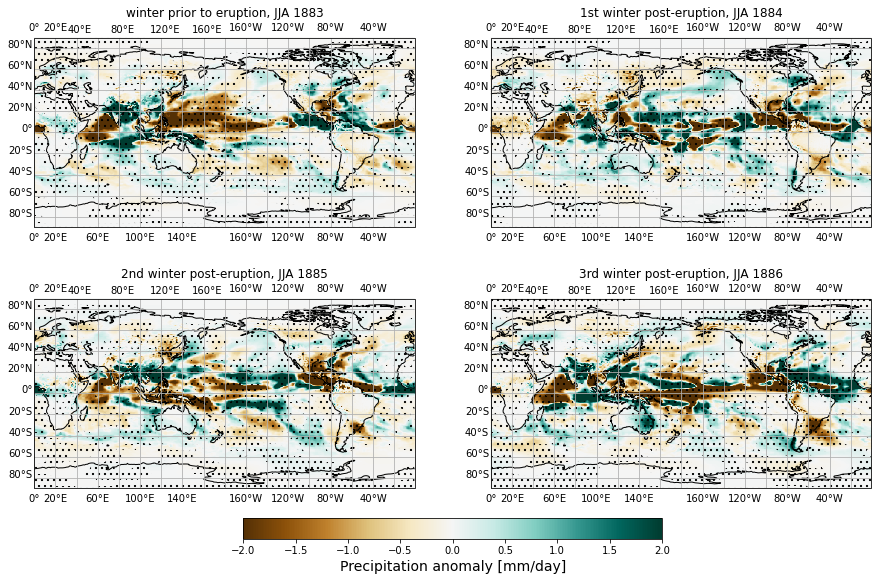

In [25]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr.sel(season='JJA'), cmax_pr, K_dates_w, titles_w, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_JJA_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

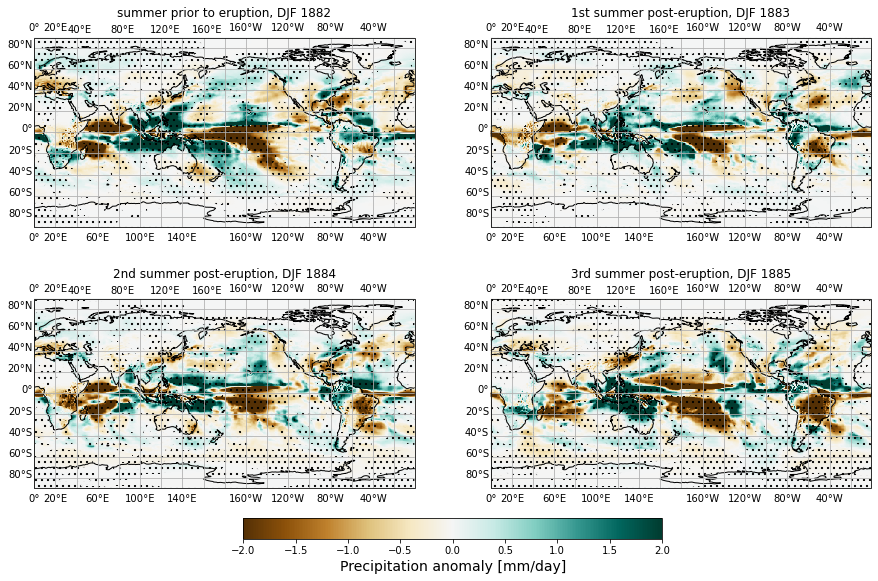

In [27]:
# plot of global monthly member mean temperature at 4 discrete time periods (not averaged)
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Glob.pr.sel(season='DJF'), cmax_pr, K_dates_s, titles_s, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(15)
fig.set_figheight(11) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_DJF_Glob.png', dpi=300)# , bbox_inches='tight') # bbox=tight removes lat labels when figure saves

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


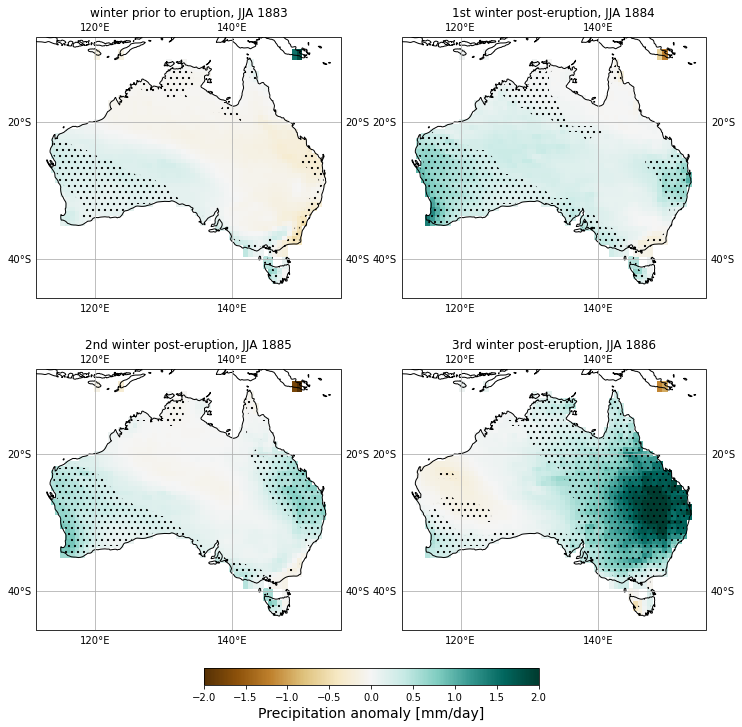

In [28]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr.sel(season='JJA'), cmax_tmp, K_dates_w, titles_w, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_JJA_Aus.png', dpi=300, bbox_inches='tight')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.01/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


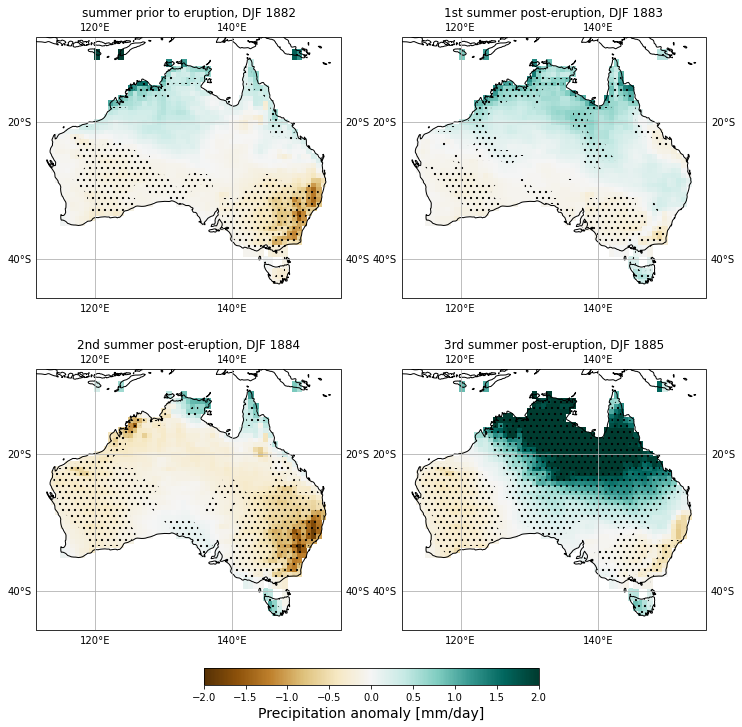

In [29]:
# plot of Aus monthly member mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr.sel(season='DJF'), cmax_tmp, K_dates_s, titles_s, 'BrBG', f'Precipitation anomaly [mm/day]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

plt.savefig('R_spatial_pr_DJF_Aus.png', dpi=300, bbox_inches='tight')

In [ ]:
# # plot of Aus monthly member mean precipitation
# fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.pr, cmax_pr, K_dates, titles, 'BrBG','Precipitation anomaly [mm/day]', 1)

# fig.set_figwidth(12)
# fig.set_figheight(14) # these two parameters change the figure height and width 

# plt.savefig('R_spatial_pr_Aus.png', dpi=300, bbox_inches='tight')